<a href="https://colab.research.google.com/github/k-messick/LinearModels/blob/main/linearmodels_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is linear because the coefficients, $b$, enter the prediction as
$$
\hat{y} = b \cdot \hat{x} = b_1 \hat{x}_1 + b_2 \hat{x}_2 + ... b_J \hat{x}_J
$$
so that the relationship between $\hat{y}$ and each $\hat{x}_j$ is a linear one through $b_j$. In otherwords, $\hat{y}$ changes linearly as each $\hat{x}_j$ changes with a slope of the coefficient $b_j$. Essentially, the linear model is defined by the relationship between the independent variables and the dependent variable being linear.
2. The coefficient for a dummy variable is the difference in the dependent variable $\hat{y}$ for the category coded as 1 compared to the reference category coded as 0. The intercept corresponds to the reference category, and the coefficients for the dummy variables represent how much the outcome changes relative to that reference category.
3. Linear regression can be used for classification, but it's not the best method because it often predicts values outside the range of the classes, such as negative probabilities.
4. Over-fitting occurs because the more complex the feature space, the more opportunities we give the model to pick non-representative cases around which to build non-representative/externally invalid models. Signs that your linear model is over-fitting include: (1) A high R² value on the training data but a lower R² on the test data (2) A model that fits the training data closely (which includes noise).
5. Multicollinearity happens when two or more independent variables in the model are highly correlated. This can influence estimates wrongly. Using the two-stage least squares technique allows for more consistent estimates. The first stage predicts the problematic variable and then these predictions are used in the main regression model in the second stage.
6. There are many options to incorporate nonlinear relationships between y and x in analysis. One option is using polynomial families to take the explanatory variable, $x$, and compute its powers $x^2$, $x^3$, ... , $x^K$. Another option is transformations, such as a logarithmic transformation or inverse hyperbolic sine transformation.
7. The intercept is interpreted as the expected value of the dependent variable when all independent variables are zero. A slope coefficient for a variable is interpreted as the change in the dependent variable for every one-unit increase in the independent variable. The coefficient for a dummy/one-hot-encoded variable is interpreted as the difference in the dependent variable between the category represented by the dummy variable and the reference category.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/content/Q1_clean.csv')

In [3]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

On average, Manhattan is the most expensive.

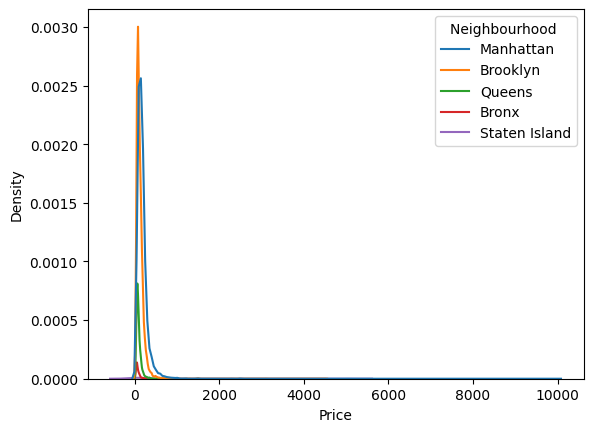

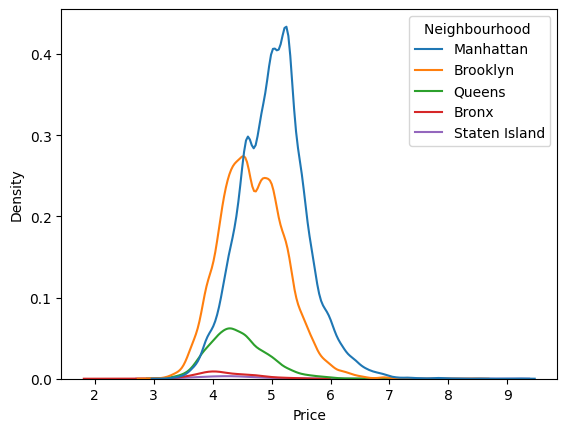

In [4]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

2.

In [5]:
#Regress price
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

display = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
display

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients in the regression are the same as the means in part 1. The coefficients are the difference in the mean of the continuous variable for the different categories of the categorical variable.

3.

In [6]:
#Regress price but leave intercept in model
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

display2 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
display2

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [7]:
print(reg.intercept_)

75.27649769585331


To handle the creation of the dummies you have you to leave the intercept in the linear model with categorical variables and not drop any category when creating dummy variables. The intercept is 75.2765. In Brooklyn, the average price of properties is 52.47 dollars higher than the average price. In Manhattan, the average price of properties is 108.39 dollars higher than the average price. In Queens, the average price of properties is 21.58 dollars higher than the average price. In Staten Island, the average price of properties is 70.89 dollars higher than the average price. To get the coefficients in part 2 from these new coefficients, you would remove the intercept in the linear model and use all the data.

4.

In [8]:
#Split the sample 80/20 into a training and a test set
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100) #Replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

display3 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) #Regression coefficients
display3

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The R2 is 0.067 and the RMSE is 125.011. The coefficient is 1.032. The most expensive kind of property you can rent is $192.64 per night in Manhattan (100*1.032257 + 89.4).

5.

In [11]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Property Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100) #Replication purposes

#All unique categories for Property Type and Neighbourhood
all_property_types = df['Property Type'].unique()
all_neighbourhoods = df['Neighbourhood '].unique()

#Create dummies with all categories for both train and test sets
Z_train = pd.concat([
    X_train['Review Scores Rating'],
    pd.get_dummies(X_train['Neighbourhood '], dtype='int', columns=all_neighbourhoods).astype(int),
    pd.get_dummies(X_train['Property Type'], dtype='int', columns=all_property_types).astype(int)
], axis=1)

Z_test = pd.concat([
    X_test['Review Scores Rating'],
    pd.get_dummies(X_test['Neighbourhood '], dtype='int', columns=all_neighbourhoods).astype(int),
    pd.get_dummies(X_test['Property Type'], dtype='int', columns=all_property_types).astype(int)
], axis=1)

#Ensure both have the same columns
Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) #Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results4 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) #Regression coefficients
results4

Rsq:  0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-27.672764
2,Brooklyn,29.242598
3,Manhattan,91.749874
4,Queens,-0.373421
5,Staten Island,44.825719
6,Apartment,-2.497177
7,Bed & Breakfast,-33.828909
8,Boat,64.452800
9,Bungalow,51.260095


The R2 on the test set is 0.075. The RMSE on the test set is 124.464. The coefficient on Review Scores Rating is 1.016. The most expensive property you can rent is $193.33 per night in Manhattan (100*1.015839 + 91.75).

6.

The coefficient changing on Review Scores Rating means that there's some variation in prices by rating and neighbourhood that is explained by property types.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

1.

In [12]:
df = pd.read_csv('/content/cars_hw.csv')

In [13]:
#Clean outliers
q_low = df["Price"].quantile(0.01)
q_hi  = df["Price"].quantile(0.99)
df = df[(df["Price"] < q_hi) & (df["Price"] > q_low)]
df

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [14]:
#Log Transformation to fix badly scaled variables
df['Mileage_Run'] = np.log1p(df['Mileage_Run'])

2.

In [15]:
#Summarize price
print(df['Price'].describe())

count    9.560000e+02
mean     7.319100e+05
std      3.388222e+05
min      2.710000e+05
25%      4.827500e+05
50%      6.665000e+05
75%      8.772500e+05
max      1.978000e+06
Name: Price, dtype: float64


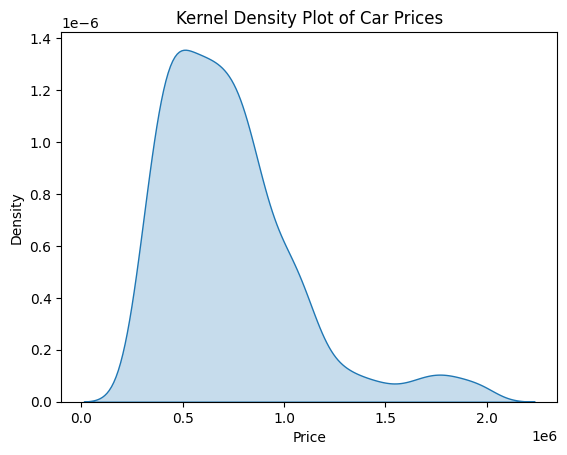

In [16]:
#Kernal density plot for price
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [17]:
#Summarize price by Make
summary_price = df.groupby('Make')['Price'].describe()
print(summary_price)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        5.0  4.908000e+05  256093.147116   273000.0   335000.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        303.0  6.947525e+05  277837.000404   273000.0   491000.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       27.0  1.830333e+06  110937.959100  1589000.0  1767000.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  288.0  5.946146e+05  213253.690825   271000.0   416500.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         68.0  6.6

It looks like the most expensive brands are MG Motors and Tata. In general, prices seem vary. Some offer more expensive vehicles and others more affordable.

3.

In [18]:
#Training and testing sets

X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#Regress on numeric variables-Model 1
numeric_vars = X_train.select_dtypes(include=[np.number]).columns.tolist()
model1 = LinearRegression()
model1.fit(X_train[numeric_vars], y_train)

LinearRegression()

In [43]:
y_train_pred1 = model1.predict(X_train[numeric_vars])
y_test_pred1 = model1.predict(X_test[numeric_vars])
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
print(f"Model 1 - Numeric Variables: R² Train: {r2_train1}, RMSE Train: {rmse_train1}, R² Test: {r2_test1}, RMSE Test: {rmse_test1}")

Model 1 - Numeric Variables: R² Train: 0.3150803988011187, RMSE Train: 286104.3028213504, R² Test: 0.30950464528044175, RMSE Test: 256509.6095204105


The R2 on the training set is 0.315. The RMSE on the training set is 286104.3. The R2 on the test set is 0.31. The RMSE on the test set is 256509.61.

In [27]:
#Regress on a model comprised of one-hot encoded regressors/features alone-Model 2
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [28]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

model2 = LinearRegression()
model2.fit(X_train_encoded, y_train)

LinearRegression()

In [42]:
y_train_pred2 = model2.predict(X_train_encoded)
y_test_pred2 = model2.predict(X_test_encoded)
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print(f"Model 2 - One-hot Encoded Variables: R² Train: {r2_train2}, RMSE Train: {rmse_train2}, R² Test: {r2_test2}, RMSE Test: {rmse_test2}")

Model 2 - One-hot Encoded Variables: R² Train: 0.8572938465105975, RMSE Train: 130594.81723502513, R² Test: 0.8041976630707701, RMSE Test: 136594.17969910786


The R2 on the test set is .804. The RMSE on the test set is 136594.2. It seems the second model performs better on the test set because the R2 is closer to 1.

In [38]:
#Combines all the regressors from the previous two
X_combined_train = pd.concat([X_train[numeric_vars], X_train_encoded], axis=1)
X_combined_test = pd.concat([X_test[numeric_vars], X_test_encoded], axis=1)

In [39]:
model3 = LinearRegression()
model3.fit(X_combined_train, y_train)

LinearRegression()

In [41]:
y_train_pred3 = model3.predict(X_combined_train)
y_test_pred3 = model3.predict(X_combined_test)
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)
rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))

print(f"Model 3 - Combined Variables: R² Train: {r2_train3}, RMSE Train: {rmse_train3}, R² Test: {r2_test3}, RMSE Test: {rmse_test3}")

Model 3 - Combined Variables: R² Train: 0.8572938465105954, RMSE Train: 130594.81723502606, R² Test: 0.8041976630707421, RMSE Test: 136594.17969911758


The R2 on the test set is 0.804. The RMSE on the test set is 136594.2. The joint model performs the same as model 2, which suggests it's not adding anything more useful beyond what model 2 shows.

5.

In [31]:
#Polynomial
polyf = PolynomialFeatures(degree=2)
X_polyf_train = polyf.fit_transform(X_combined_train)
X_polyf_test = polyf.transform(X_combined_test)

model_polyf = LinearRegression()
model_polyf.fit(X_polyf_train, y_train)

LinearRegression()

In [32]:
y_polyf_pred = model_polyf.predict(X_polyf_test)
rmse_polyf = np.sqrt(mean_squared_error(y_test, y_polyf_pred))
r2_polyf = r2_score(y_test, y_polyf_pred)

print(f"Polynomial Model: R² Test: {r2_polyf}, RMSE Test: {rmse_polyf}")

Polynomial Model: R² Test: -659.0578539998086, RMSE Test: 7930750.010932973


As you increase the degress of expansion, the R2 decreases and the RMSE increases. It seems worse than the model from part 4 because R2 is farther away from 1. R2 goes negative on the test set when the model's predictions have a higher error. For the best model with expanded features, the R2 is -659.06 and the RMSE is 7930750.01. It is likely worse than my best model from part 4 because it has a R2 farther away from 1.

6.

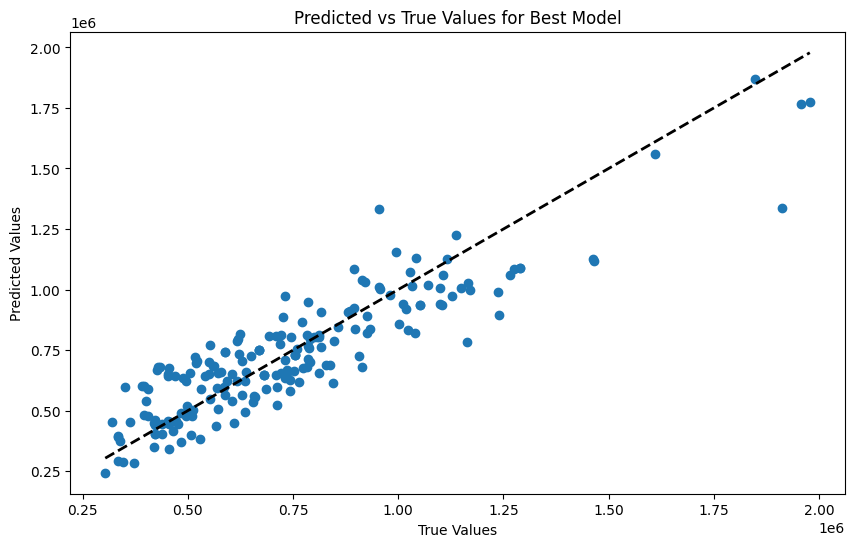

In [33]:
#Determine the predicted values for the test data and plot them against the true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs True Values for Best Model')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

The predicted values and true values roughly line up along the diagonal.

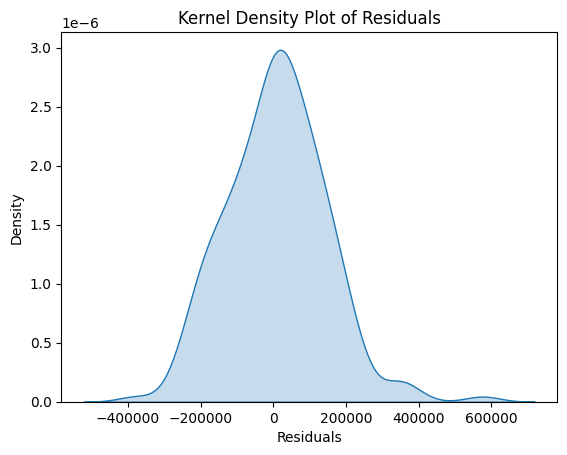

In [34]:
residuals = y_test - y_test_pred3
sns.kdeplot(residuals, fill=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The residuals look roughly bell-shaped. The strengths of my model include being able to make good predictions on training data, however one weakness is that outliers might still influence these predictions.